In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file_path = "/content/Dataset_OilPricePrediction.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [24]:
df.head()

,DATE,FWTI,SWTI,PRO,COM,GAS,RDL,RUB,GOLD,SIL
0,1997-01-02,25.69,25.55,65180.2,41467.12,2.89,95.03,3.80,366.6,4.69
1,1997-01-03,25.59,25.55,65180.2,41467.12,3.11,95.44,3.80,362.0,4.65
2,1997-01-06,26.37,26.25,65180.2,41467.12,3.64,94.92,3.78,358.7,4.61
3,1997-01-07,26.23,26.25,65180.2,41467.12,3.33,95.05,3.78,359.7,4.67
4,1997-01-08,26.62,26.55,65180.2,41467.12,3.51,95.40,3.77,356.8,4.62


Exploratory Data Analysis

In [25]:
df.columns


Index(['DATE', 'FWTI', 'SWTI', 'PRO', 'COM', 'GAS', 'RDL', 'RUB', 'GOLD',
       'SIL'],
      dtype='object')

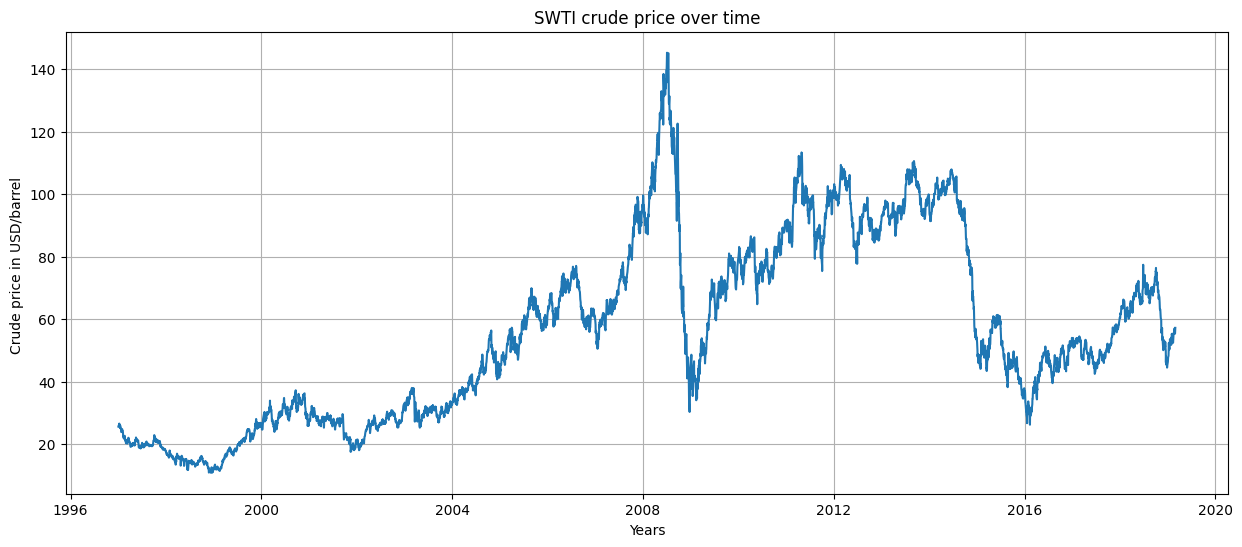

In [26]:
dates = df.iloc[:,0]
swti_prices = df.iloc[:,2]

plt.figure(figsize=(15, 6))
plt.plot(dates , swti_prices)
plt.title('SWTI crude price over time')
plt.xlabel('Years')
plt.ylabel('Crude price in USD/barrel ')
plt.grid(True)


In [27]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [28]:
df.isna().sum()

DATE    0
FWTI    0
SWTI    0
PRO     0
COM     0
GAS     0
RDL     0
RUB     0
GOLD    0
SIL     0
dtype: int64

In [29]:
df.dtypes

DATE    datetime64[ns]
FWTI           float64
SWTI           float64
PRO            float64
COM            float64
GAS            float64
RDL            float64
RUB            float64
GOLD           float64
SIL            float64
dtype: object

In [30]:
df.describe()

,DATE,FWTI,SWTI,PRO,COM,GAS,RDL,RUB,GOLD,SIL
count,5547,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000
mean,2008-01-29 19:16:15.446187264,56.165008,56.131213,73674.682463,44172.156411,4.401282,97.177591,225.102028,832.224049,13.589400
min,1997-01-02 00:00:00,10.720000,10.820000,64307.900000,38030.840000,1.630000,68.970000,3.360000,253.000000,4.030000
25%,2002-07-22 12:00:00,29.640000,29.730000,68772.780000,42397.330000,2.780000,91.345000,66.595000,334.550000,5.210000
50%,2008-02-06 00:00:00,52.380000,52.240000,73835.870000,44159.280000,3.770000,98.100000,107.190000,803.000000,13.420000
75%,2013-08-06 12:00:00,78.965000,78.860000,76756.490000,45712.300000,5.520000,103.795000,160.865000,1256.050000,17.530000
max,2019-02-28 00:00:00,145.290000,145.310000,84305.480000,50988.580000,15.380000,128.070000,3414.400000,1873.700000,48.420000
std,NaN,29.139667,29.131305,5144.922765,2492.195800,2.251733,12.755228,537.402911,479.026704,8.773069


# `Visualising the Data`

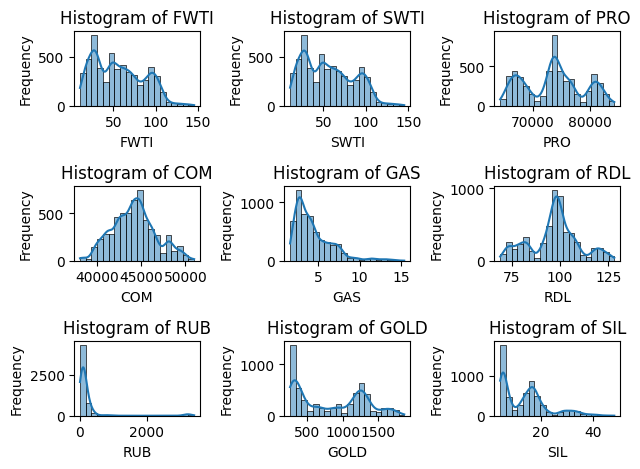

In [31]:
plt.figure()
for i , col in enumerate(df.columns[1:]):
  plt.subplot(3, 3, i + 1)
  sns.histplot(df[col], bins = 20,kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

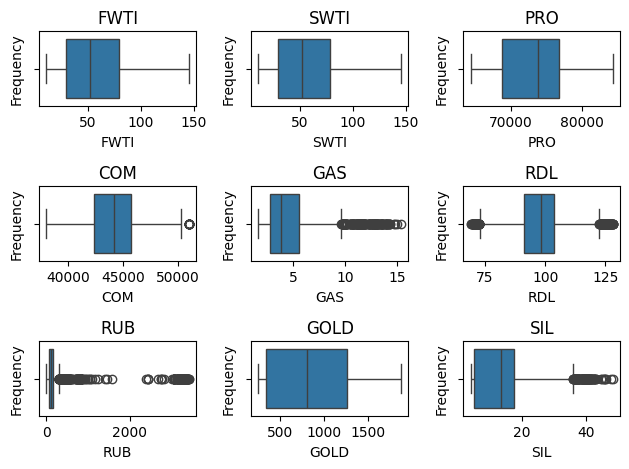

In [32]:
plt.figure()

for i , col in enumerate(df.columns[1:]):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(x = df[col])
  plt.title(f'{col}')
  plt.xlabel(col)
  plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#`Corelation Heat Map`


In [33]:
correlation_matrix = df.drop(["DATE","FWTI"],axis =1).corr()

In [34]:
correlation_matrix

,SWTI,PRO,COM,GAS,RDL,RUB,GOLD,SIL
SWTI,1.000000,0.555239,0.397060,0.346954,-0.283415,-0.334232,0.745759,0.792396
PRO,0.555239,1.000000,0.881832,-0.009274,0.302747,-0.342410,0.800751,0.604306
COM,0.397060,0.881832,1.000000,0.060854,0.263724,-0.392089,0.614186,0.431178
GAS,0.346954,-0.009274,0.060854,1.000000,-0.670491,-0.177924,-0.179892,-0.089434
RDL,-0.283415,0.302747,0.263724,-0.670491,1.000000,-0.008589,0.269364,0.078308
RUB,-0.334232,-0.342410,-0.392089,-0.177924,-0.008589,1.000000,-0.310798,-0.245417
GOLD,0.745759,0.800751,0.614186,-0.179892,0.269364,-0.310798,1.000000,0.930641
SIL,0.792396,0.604306,0.431178,-0.089434,0.078308,-0.245417,0.930641,1.000000


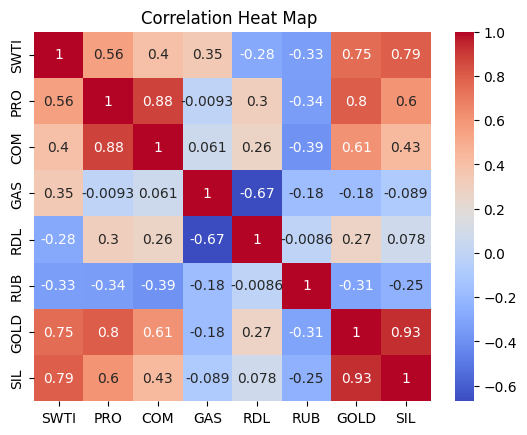

In [35]:
plt.figure()
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm')
plt.title('Correlation Heat Map ')
plt.show()

# Time Series Charts

In [36]:
df["DATE"] = pd.to_datetime(df["DATE"])

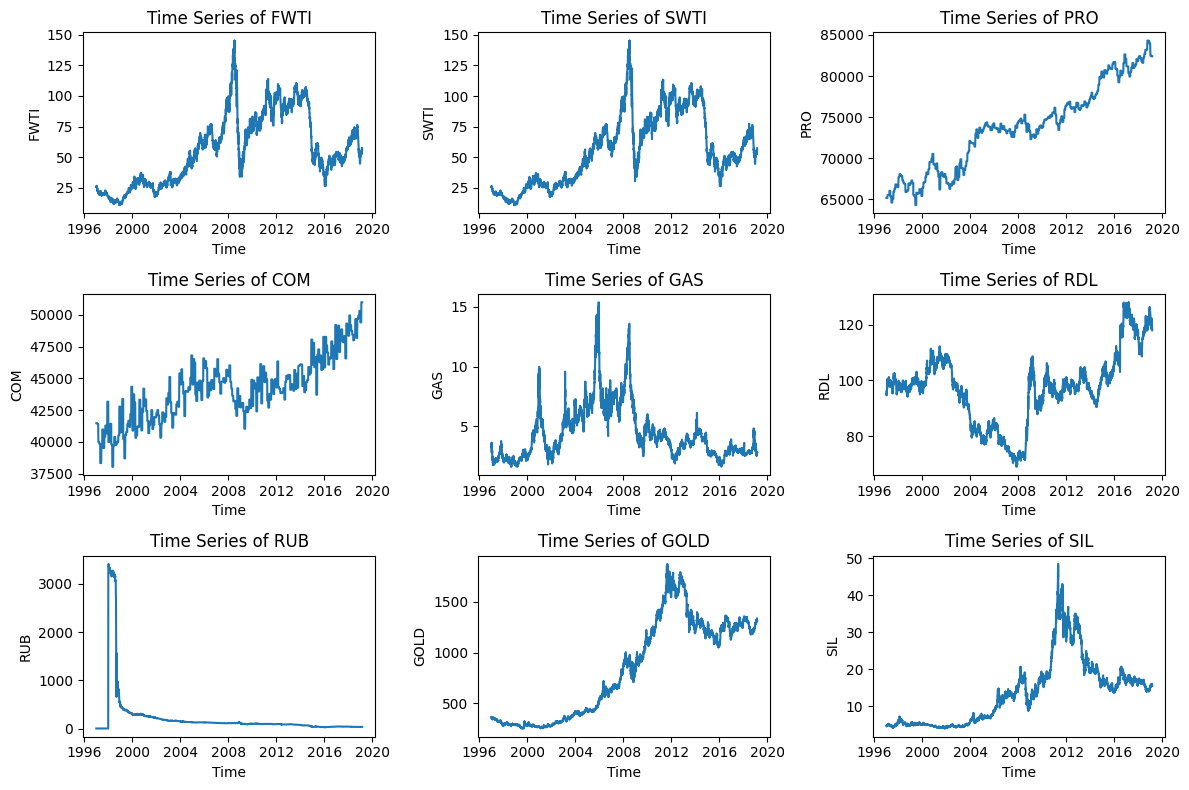

In [37]:
plt.figure(figsize = (12,8))
for i , col in enumerate(df.columns[1:]):
  plt.subplot(3,3,i+1)
  plt.plot(df["DATE"],df[col])
  plt.title(f'Time Series of {col}')
  plt.xlabel('Time')
  plt.ylabel(col)

plt.tight_layout()
plt.show()

# Feature Enginnering

In [38]:
#lag_periods

lag_periods = 3

for i in range(1,lag_periods + 1):
  df[f'SWTI_lag_{i}'] = df['SWTI'].shift(i)

In [39]:
#Rolling Mean

df['SWTI_rolling_mean'] = df['SWTI'].rolling(window=10).mean()

In [40]:
#Time Features

df['Month'] = df["DATE"].dt.month
df['Year']  = df["DATE"].dt.year

In [41]:
#Supply Demand ratio

df['SD_ratio'] = df["PRO"]/df["COM"]

In [42]:
df.columns

Index(['DATE', 'FWTI', 'SWTI', 'PRO', 'COM', 'GAS', 'RDL', 'RUB', 'GOLD',
       'SIL', 'SWTI_lag_1', 'SWTI_lag_2', 'SWTI_lag_3', 'SWTI_rolling_mean',
       'Month', 'Year', 'SD_ratio'],
      dtype='object')

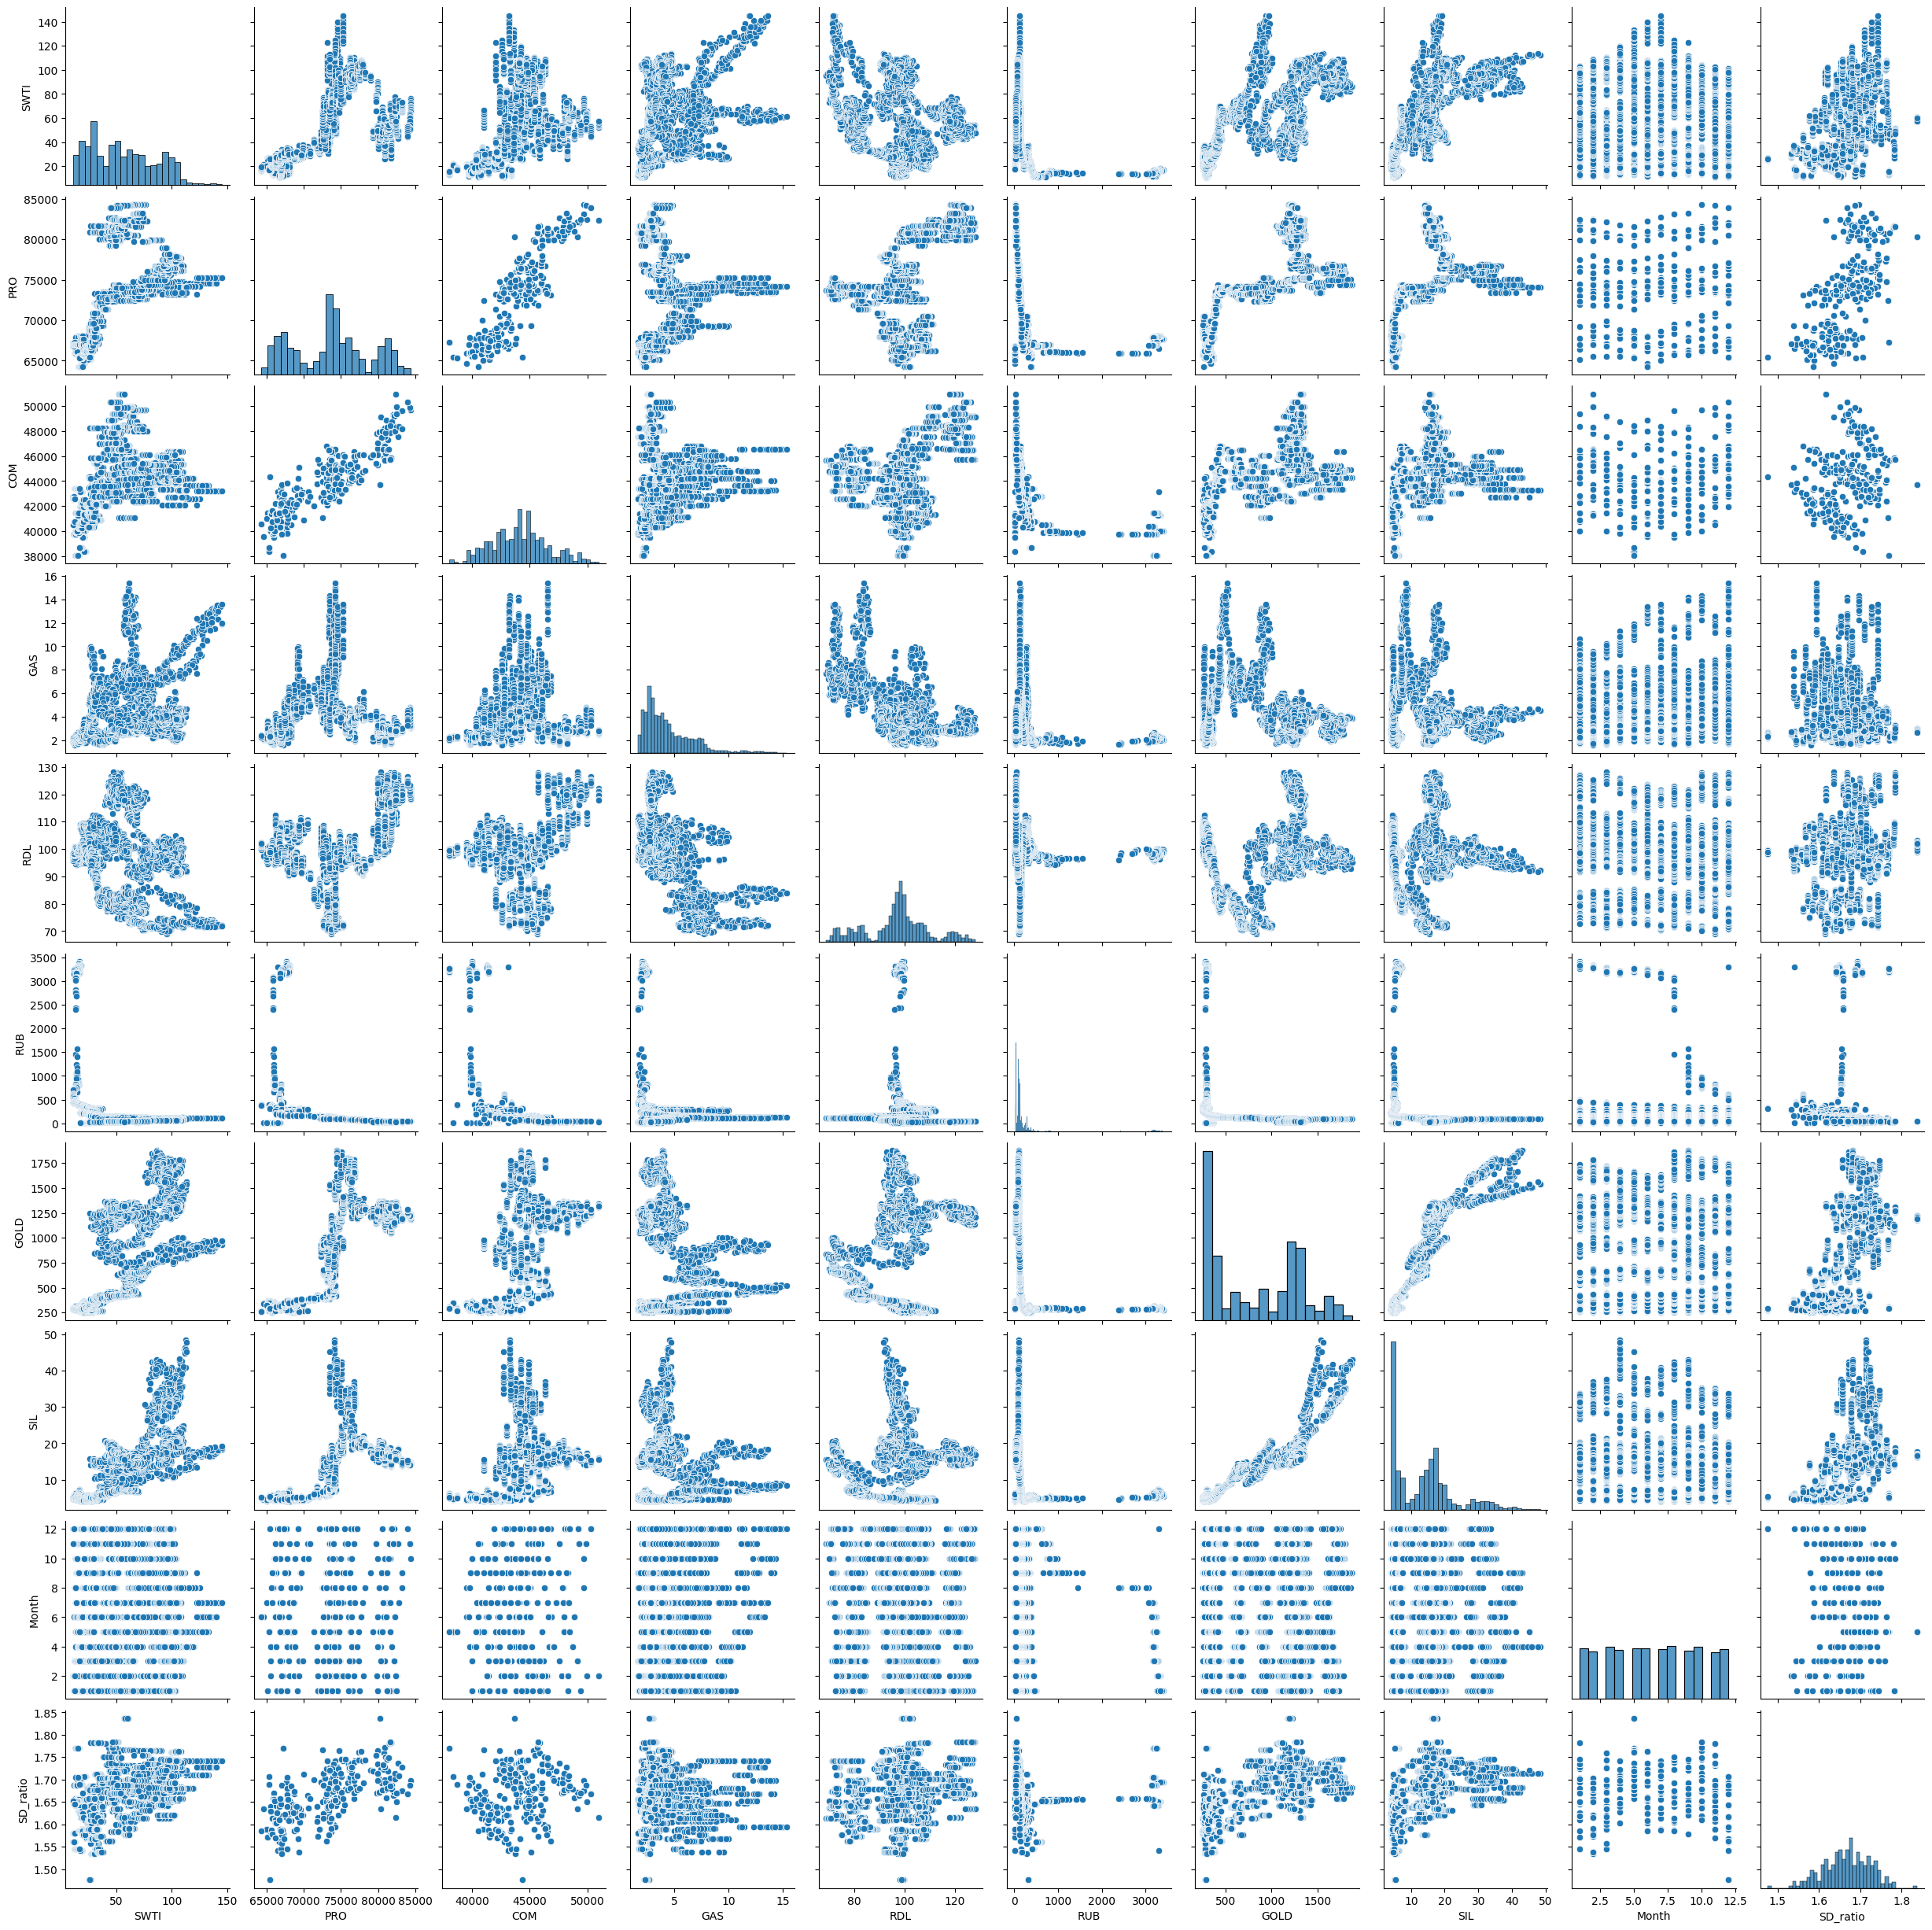

In [43]:
sns.pairplot(df.drop(['DATE','FWTI','SWTI_lag_1', 'SWTI_lag_2', 'SWTI_lag_3', 'SWTI_rolling_mean','Year'],axis = 1))
plt.show()

# Machine Learning

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [45]:
y = df['SWTI']
X = df.drop(['FWTI','SWTI','DATE','SWTI_lag_1', 'SWTI_lag_2', 'SWTI_lag_3','SWTI_rolling_mean','Year','Month'],axis =1)

In [46]:
df.columns

Index(['DATE', 'FWTI', 'SWTI', 'PRO', 'COM', 'GAS', 'RDL', 'RUB', 'GOLD',
       'SIL', 'SWTI_lag_1', 'SWTI_lag_2', 'SWTI_lag_3', 'SWTI_rolling_mean',
       'Month', 'Year', 'SD_ratio'],
      dtype='object')

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [48]:
X_train.columns

Index(['PRO', 'COM', 'GAS', 'RDL', 'RUB', 'GOLD', 'SIL', 'SD_ratio'], dtype='object')

Different Model Performance

In [49]:
mlp = MLPRegressor(max_iter=100000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "SVR" : SVR(),
    "rf" : RandomForestRegressor(),
    "nn" : mlp,
    "tree_model" : DecisionTreeRegressor(),
    "lasso_model" : Lasso(),
    "ridge" : Ridge()
}

results = []

for model_name , model in models.items() :
    cv_scores = cross_val_score(model,X_train_scaled,y_train,cv=5)

    results.append(cv_scores)

In [50]:
results

[array([0.90997303, 0.90711803, 0.91406325, 0.91097933, 0.90155413]),
 array([0.99622312, 0.99540384, 0.99629083, 0.99572468, 0.99376426]),
 array([0.98113483, 0.97683642, 0.97934187, 0.96261814, 0.97196414]),
 array([0.99131072, 0.99290644, 0.991318  , 0.99194657, 0.98789938]),
 array([0.84724434, 0.8439059 , 0.86693779, 0.8644227 , 0.84643849]),
 array([0.86121012, 0.85095221, 0.87780168, 0.86961699, 0.86273989])]

In [51]:
mean_per_row = [np.mean(row) for row in results]
print(mean_per_row)

[0.9087375520990604, 0.9954813460723717, 0.9743790803690722, 0.9910762250170716, 0.8537898437681071, 0.8644641786968223]


{'whiskers': [<matplotlib.lines.Line2D at 0x7cd8d148ac50>,
 'caps': [<matplotlib.lines.Line2D at 0x7cd8d148b190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cd8d148a9b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7cd8d148b6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cd8d141d750>,
 'means': []}

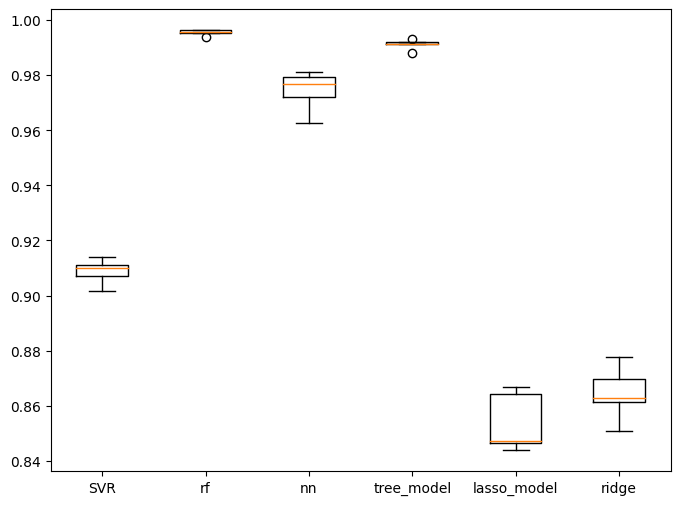

In [52]:
plt.figure(figsize=(8,6))

plt.boxplot(results, labels=models.keys())

Random Forest

In [53]:
X_train.columns

Index(['PRO', 'COM', 'GAS', 'RDL', 'RUB', 'GOLD', 'SIL', 'SD_ratio'], dtype='object')

In [55]:
steps = [
    ("scaler",StandardScaler()),
    ("rf",RandomForestRegressor())
]

pipeline = Pipeline(steps)

param_dist = {

    "rf__n_estimators" : randint(100,1000),
    "rf__max_depth" : randint(3,20),
    "rf__min_samples_split" : randint(2,20),
    "rf__min_samples_leaf" : randint(1,20),
    "rf__max_features" : ["sqrt","log2"],
    "rf__bootstrap" : [True,False]
}

random_search = RandomizedSearchCV(pipeline , param_distributions = param_dist , n_iter = 100 , cv=5)

random_search.fit(X_train , y_train)

print("Best Parameters : ",random_search.best_params_)
print("Best Score : ",random_search.best_score_)

Best Parameters :  {'rf__bootstrap': False, 'rf__max_depth': 14, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 3, 'rf__n_estimators': 798}
Best Score :  0.9959472843585193


Text(0, 0.5, 'Predicted price in $/1000 barrels ')

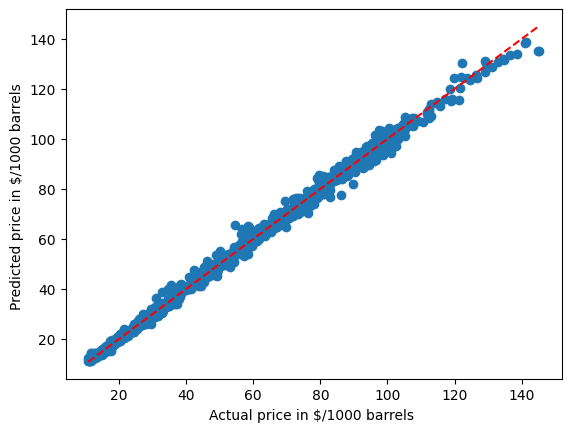

In [59]:
y_test_pred_rf = random_search.predict(X_test)
plt.figure()
plt.scatter(y_test , y_test_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual price in $/1000 barrels ')
plt.ylabel('Predicted price in $/1000 barrels ')

In [60]:
MSE = mean_squared_error(y_test, y_test_pred_rf)
APE = np.abs( (y_test_pred_rf - y_test)/y_test )
MAPE = np.mean(APE)*100

print("R2 : ",random_search.score(X_test_scaled , y_test))
print("MSE : ",MSE)
print("RMSE :",np.sqrt(MSE))
print("MAPE :",MAPE)

R2 :  -1.1727325640176964
MSE :  2.6102404911527595
RMSE : 1.6156238705691246
MAPE : 2.2388293589259143


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


rough work Random Forest


In [72]:
steps = [
    ("scaler",StandardScaler()),
    ("rf",RandomForestRegressor())
]

pipeline = Pipeline(steps)

param_dist = {

    "rf__n_estimators" : randint(100,1000),
    "rf__max_depth" : randint(3,20),
    "rf__min_samples_split" : randint(2,20),
    "rf__min_samples_leaf" : randint(1,20),
    "rf__max_features" : ["sqrt","log2"],
    "rf__bootstrap" : [True,False]
}

random_search_x = RandomizedSearchCV(pipeline , param_distributions = param_dist , n_iter = 100 , cv=5)

random_search_x.fit(X_train , y_train)

print("Best Parameters : ",random_search.best_params_)
print("Best Score : ",random_search.best_score_)

Best Parameters :  {'rf__bootstrap': False, 'rf__max_depth': 14, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 3, 'rf__n_estimators': 798}
Best Score :  0.9959472843585193


In [ ]:
y_pred_rf_x = random_search_x.predict(X_test)

In [73]:
_MSE = mean_squared_error(y_test, y_test_pred_rf)
APE = np.abs( (y_test_pred_rf - y_test)/y_test )
MAPE = np.mean(APE)*100

print("R2 : ",random_search_x.score(X_test , y_test))
print("MSE : ",MSE)
print("RMSE :",np.sqrt(MSE))
print("MAPE :",MAPE)

R2 :  0.9967591835508286
MSE :  8.282748973452632
RMSE : 2.877976541504922
MAPE : 2.2388293589259143


TREE Regressor


In [74]:
steps = [
    ("scaler",StandardScaler()),
    ("dt",DecisionTreeRegressor())
]

pipeline = Pipeline(steps)

param_dist = {

    "dt__max_depth" : randint(3,20),
    "dt__min_samples_split" : randint(2,20),
    "dt__min_samples_leaf" : randint(1,20),
    "dt__max_features" : ["sqrt","log2"]

}

random_search_dt = RandomizedSearchCV(pipeline , param_distributions = param_dist , n_iter = 100 , cv=5)

random_search_dt.fit(X_train , y_train)

print("Best Parameters : ",random_search_dt.best_params_)
print("Best Score : ",random_search_dt.best_score_)

Best Parameters :  {'dt__max_depth': 17, 'dt__max_features': 'log2', 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 8}
Best Score :  0.9899985525035631


Text(0, 0.5, 'Predicted price in $/1000 barrels ')

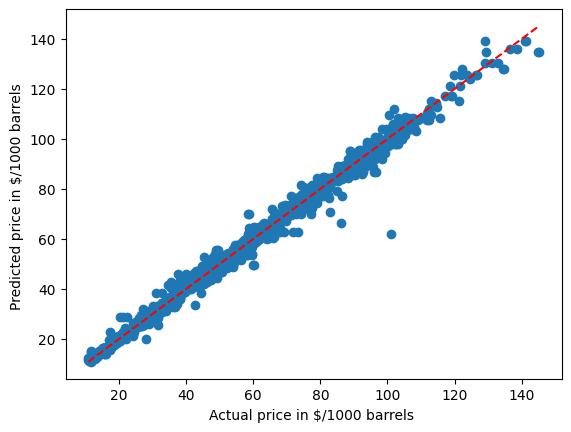

In [75]:
y_test_pred_dt = random_search_dt.predict(X_test)
plt.figure()
plt.scatter(y_test , y_test_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual price in $/1000 barrels ')
plt.ylabel('Predicted price in $/1000 barrels ')

In [76]:
MSE = mean_squared_error(y_test, y_test_pred_dt)
APE = np.abs( (y_test_pred_dt - y_test)/y_test )
MAPE = np.mean(APE)*100

print("R2 : ",random_search_dt.score(X_test , y_test))
print("MSE : ",MSE)
print("RMSE :",np.sqrt(MSE))
print("MAPE :",MAPE)

R2 :  0.993220232963855
MSE :  5.892931614053625
RMSE : 2.4275361200306835
MAPE : 3.0136086282062347


SVR - Hyperparameter tuning and finding the best kernal




In [77]:
#pipeline and its steps
steps = [
    ("scaler",StandardScaler()),
    ("SVR_model", SVR())
    ]
pipeline = Pipeline(steps)
#parameters
parameters = {
    "SVR_model__C": [0.1, 1, 10],
    "SVR_model__kernel": ["linear", "poly", "rbf", "sigmoid"]
}

#loading model ad parameters into CV using GridSearch
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train , y_train)
#printing results
print("Best Score : ",cv.best_score_ ,"; Best Parameters : ",cv.best_params_)



Best Score :  0.9546629200719832 ; Best Parameters :  {'SVR_model__C': 10, 'SVR_model__kernel': 'rbf'}


In [78]:
all_test_scores = cv.cv_results_['mean_test_score']
print("All Test Scores:", all_test_scores)


All Test Scores: [  0.85439681   0.67981964   0.73950064   0.80135685   0.85837568
   0.78207534   0.9087741    0.28793032   0.85886561   0.85355744
   0.95466292 -83.76017868]


In [79]:
results = cv.cv_results_
param_combinations = results['params']
mean_test_scores = results['mean_test_score']

for params, score in zip(param_combinations, mean_test_scores):
    print("Combination:", params, "; Mean Test Score:", score)


Combination: {'SVR_model__C': 0.1, 'SVR_model__kernel': 'linear'} ; Mean Test Score: 0.8543968128804782
Combination: {'SVR_model__C': 0.1, 'SVR_model__kernel': 'poly'} ; Mean Test Score: 0.6798196436726602
Combination: {'SVR_model__C': 0.1, 'SVR_model__kernel': 'rbf'} ; Mean Test Score: 0.7395006388564613
Combination: {'SVR_model__C': 0.1, 'SVR_model__kernel': 'sigmoid'} ; Mean Test Score: 0.8013568483659428
Combination: {'SVR_model__C': 1, 'SVR_model__kernel': 'linear'} ; Mean Test Score: 0.8583756817288581
Combination: {'SVR_model__C': 1, 'SVR_model__kernel': 'poly'} ; Mean Test Score: 0.7820753388009354
Combination: {'SVR_model__C': 1, 'SVR_model__kernel': 'rbf'} ; Mean Test Score: 0.9087741014934665
Combination: {'SVR_model__C': 1, 'SVR_model__kernel': 'sigmoid'} ; Mean Test Score: 0.2879303221916218
Combination: {'SVR_model__C': 10, 'SVR_model__kernel': 'linear'} ; Mean Test Score: 0.8588656131751558
Combination: {'SVR_model__C': 10, 'SVR_model__kernel': 'poly'} ; Mean Test Score:

In [80]:
best_est = cv.best_estimator_

In [81]:
y_pred_test = best_est.predict(X_test)

In [82]:
test_score = r2_score(y_test , y_pred_test)
print(test_score)

0.9633721697542331


Text(0, 0.5, 'Predicted')

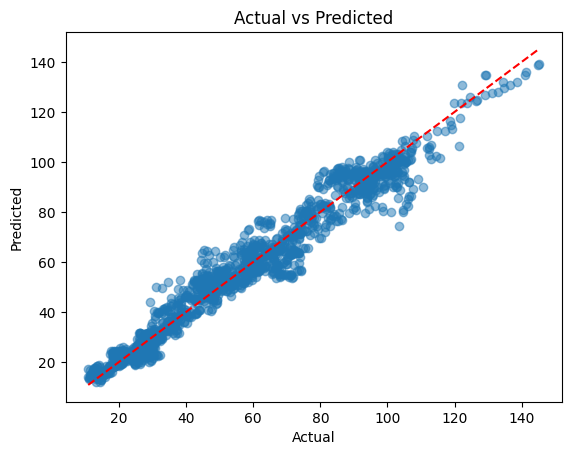

In [83]:
#Plotting y_test vs y_predicted

plt.figure()

plt.scatter(y_test , y_pred_test , alpha = 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Since RBF had the best scores with c= 1 and c = 10 , we will proceed to hyperparameter tuning of SVR with RBF between 1 and 10

In [84]:
#without scaling

svr_model = SVR(kernel = 'rbf', C=10)
svr_model.fit(X_train , y_train)
print(svr_model.score(X_train,y_train))

0.3560453637461555


In [85]:
#with scaling
# We understand that scaling makes a huge difference for SVR


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svr_model_us = SVR(kernel ='rbf',C=10)
svr_model_us.fit(X_train_scaled , y_train)
print(svr_model_us.score(X_train_scaled,y_train))

0.9592195301094026


In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svr_model_us = SVR(kernel ='rbf',C=100)
svr_model_us.fit(X_train_scaled , y_train)
print(svr_model_us.score(X_train_scaled,y_train))

0.9775192414341449


In [87]:
X_test_scaled = scaler.transform(X_test)
y_pred_test = svr_model_us.predict(X_test_scaled)
MSE = mean_squared_error(y_test, y_pred_test)
APE = np.abs( (y_pred_test - y_test)/y_test )
MAPE = np.mean(APE)*100

print("R2 : ",svr_model_us.score(X_test_scaled , y_test))
print("MSE : ",MSE)
print("RMSE :",np.sqrt(MSE))
print("MAPE :",MAPE)

R2 :  0.9797804718426891
MSE :  17.574688933148803
RMSE : 4.192217662902155
MAPE : 5.989373555072604


In [88]:
r2 = []
MSE = []
RMSE = []
MAPE = []
l = [50,100,200,400,800,1600,3200,6400]
for c_value in l:
  SVR_rbf_cfinder = SVR(kernel = 'rbf',C=c_value)
  SVR_rbf_cfinder.fit(X_train_scaled,y_train)
  y_pred_test = SVR_rbf_cfinder.predict(X_test_scaled)

  APE = np.abs( (y_pred_test - y_test)/y_test )
  MAPE.append( np.mean(APE)*100 )
  MSE.append( mean_squared_error(y_test, y_pred_test) )
  RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
  r2.append(SVR_rbf_cfinder.score(X_train_scaled,y_train))


In [89]:
print("R2 : ",r2)
print("MSE : ",MSE)
print("RMSE :",np.sqrt(MSE))
print("MAPE :",MAPE)

R2 :  [0.9732914639396242, 0.9775192414341449, 0.980711938129592, 0.9836819214582664, 0.9861409279336665, 0.9880267150941212, 0.9894274649763167, 0.9905025254846576]
MSE :  [20.631184429420426, 17.574688933148803, 15.239522534067856, 13.108768040595361, 11.291680083836926, 9.913795096866268, 8.863982698197988, 7.988823669035829]
RMSE : [4.54215636 4.19221766 3.90378311 3.62060327 3.36030952 3.14861797
 2.97724414 2.82645072]
MAPE : [6.5601046894936665, 5.989373555072604, 5.482141333676374, 5.028876477958441, 4.657743452409543, 4.384032837156019, 4.150082443729064, 3.9798768081334703]


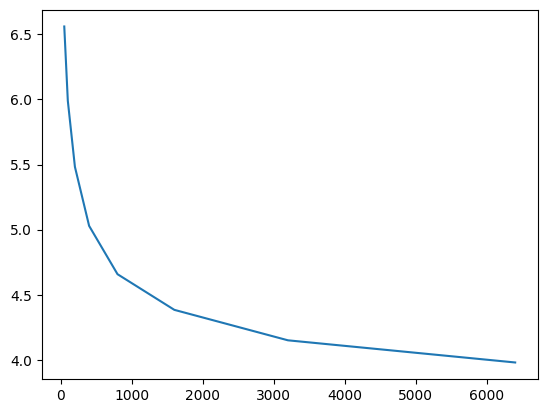

In [90]:
plt.figure()
plt.plot(l, MAPE)

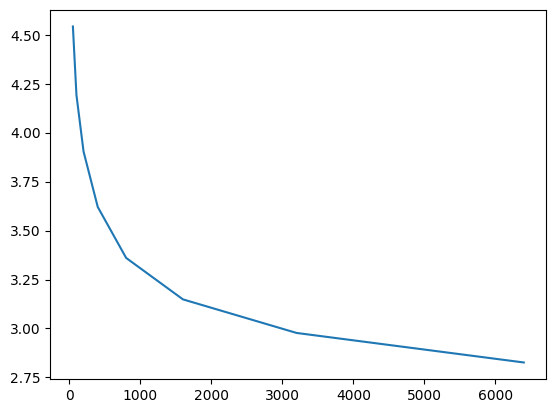

In [91]:
plt.plot(l, RMSE)

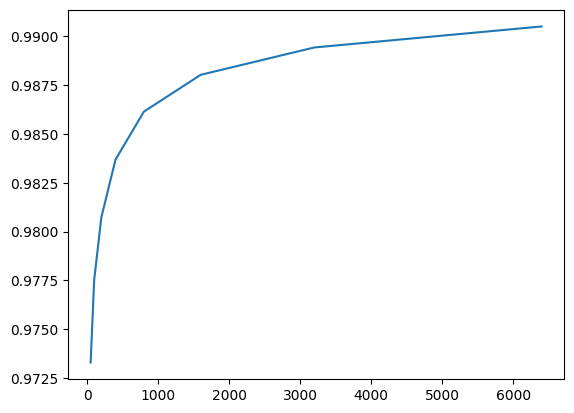

In [92]:
plt.plot(l, r2)

# More hyper parameter tuning for SVR with rbf

In [93]:
steps = [
    ("scaling",StandardScaler()),
    ("svr_rbf", SVR())
]
pipeline = Pipeline(steps)

parameters = {
        "svr_rbf__C": np.linspace(0.5,35,35),
    "svr_rbf__kernel": ["rbf"]
}

cv3 = GridSearchCV(pipeline , param_grid = parameters)
cv3.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('svr_rbf', SVR())]),
             param_grid={'svr_rbf__C': array([ 0.5       ,  1.51470588,  2.52941176,  3.54411765,  4.55882353,
        5.57352941,  6.58823529,  7.60294118,  8.61764706,  9.63235294,
       10.64705882, 11.66176471, 12.67647059, 13.69117647, 14.70588235,
       15.72058824, 16.73529412, 17.75      , 18.76470588, 19.77941176,
       20.79411765, 21.80882353, 22.82352941, 23.83823529, 24.85294118,
       25.86764706, 26.88235294, 27.89705882, 28.91176471, 29.92647059,
       30.94117647, 31.95588235, 32.97058824, 33.98529412, 35.        ]),
                         'svr_rbf__kernel': ['rbf']})

Text(0, 0.5, 'mean_test_score')

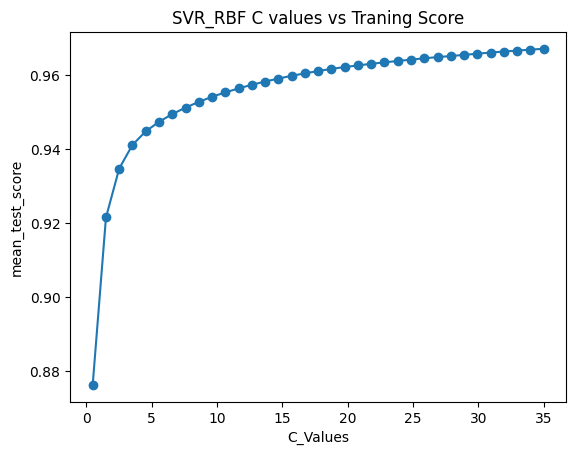

In [94]:
mean_test_score = cv3.cv_results_['mean_test_score']
C_values = cv3.cv_results_['param_svr_rbf__C'].data

plt.figure()
plt.plot(C_values , mean_test_score , marker ='o')
plt.title('SVR_RBF C values vs Traning Score')
plt.xlabel('C_Values')
plt.ylabel('mean_test_score')

Lasso

In [95]:
steps = [
    ("scaler", StandardScaler()),
    ("lasso", Lasso())
]

parameters = {
    "lasso__alpha" : np.linspace(0.01,1,20)
}

pipeline = Pipeline(steps)

grid_search_l = GridSearchCV(pipeline , param_grid = parameters)
grid_search_l.fit(X_train , y_train)

print("best score : ", grid_search_l.best_score_)
print("best parameter : ",grid_search_l.best_params_)

best score :  0.8644496941234164
best parameter :  {'lasso__alpha': 0.01}


In [96]:
y_test_pred_l = grid_search_l.predict(X_test)

In [97]:
MSE = mean_squared_error(y_test, y_test_pred_l)
APE = np.abs( (y_test_pred_l - y_test)/y_test )
MAPE = np.mean(APE)*100

print("R2 : ",grid_search_l.score(X_test , y_test))
print("MSE : ",MSE)
print("RMSE :",np.sqrt(MSE))
print("MAPE :",MAPE)

R2 :  0.8690078194123816
MSE :  113.85759393548688
RMSE : 10.670407393135788
MAPE : 18.407830882886746


In [98]:
steps = [
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
]

parameters = {
    "ridge__alpha" : np.linspace(0.001,1,200)
}

pipeline = Pipeline(steps)

grid_search_r = GridSearchCV(pipeline , param_grid = parameters)
grid_search_r.fit(X_train , y_train)

print("best score : ", grid_search_r.best_score_)
print("best parameter : ",grid_search_r.best_params_)

best score :  0.8644848761743749
best parameter :  {'ridge__alpha': 0.08132160804020101}


In [99]:
y_test_pred_r = grid_search_r.predict(X_test)

In [100]:
MSE = mean_squared_error(y_test, y_test_pred_r)
APE = np.abs( (y_test_pred_r - y_test)/y_test )
MAPE = np.mean(APE)*100

print("R2 : ",grid_search_r.score(X_test , y_test))
print("MSE : ",MSE)
print("RMSE :",np.sqrt(MSE))
print("MAPE :",MAPE)

R2 :  0.8691417411105611
MSE :  113.74119002296273
RMSE : 10.664951477759415
MAPE : 18.363966795884927


In [1]:
'''
Summary

Model Name           R2          MAPE          MSE           RMSE

RandomForest         0.99665     2.396        2.91          1.71

SVR - rbf            0.9865      3.498        11.75         3.42

Lasso                0.87        18.40         113.85       10.67

Ridge                0.8691      18.36         113.7       10.66
'''

'\nSummary\n\nModel Name           R2          MAPE          MSE           RMSE\n\nRandomForest         0.99665     2.396        2.91          1.71\n\nSVR - rbf            0.9865      3.498        11.75         3.42\n\nLasso                0.87        18.40         113.85       10.67\n\nRidge                0.8691      18.36         113.7       10.66\n'